In [1]:
what_were_covering = {1:"data",
                      2:"build model",
                      3:"filtting the model to data",
                      4:"making predictions and evalution model",
                      5:"imporve through experiments",
                      6:"saving and loading a model"}
print(what_were_covering)

{1: 'data', 2: 'build model', 3: 'filtting the model to data', 4: 'making predictions and evalution model', 5: 'imporve through experiments', 6: 'saving and loading a model'}


In [2]:
import torch
from torch import nn #nn contains all of PyTorchs building blocks for  neural networks
import matplotlib.pyplot as plt

In [3]:
#check pytorch version 
torch.__version__

'1.12.1'

## 1) Data

In [4]:
#create hyperparameters
weight = 0.7
bias = 0.4

# input data
start = 0
end = 1
step = 0.02
x = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*x + bias

x[:10],y[:10]


len(x),len(y)

(50, 50)

###### spliting data into training and testing sets

lets create a training and test set with our data

In [5]:
train_split = int(0.8 * len(x))
x_train , y_train = x[:train_split], y[:train_split] #80 per x,y as training
x_test , y_test = x[train_split:],y[train_split:] #20 per x,y as testing 

len(x_train) , len(y_train) , len(x_test) , len(y_test)

(40, 40, 10, 10)

visualization of our data

In [6]:
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data = x_test,
                     test_labels=y_test,
                     predictions=None):
    """
    Plots training data,test data and compares predictions
    """
    plt.figure(figsize=(10,7))
    
    
    # plot training data in blue 
    plt.scatter(train_data,train_labels,c='b',s=4,label="Training data")
    
    #plot test data in green
    plt.scatter(test_data,test_labels,c="y",s=4,label="Testing data")
    
    #are there predictions?
    if predictions is not None:
        #ploy the predictions if they exits
        plt.scatter(test_data,predictions,c="r",s=4,label="predictions")
    
    #show the legend
    plt.legend(prop={"size":14})

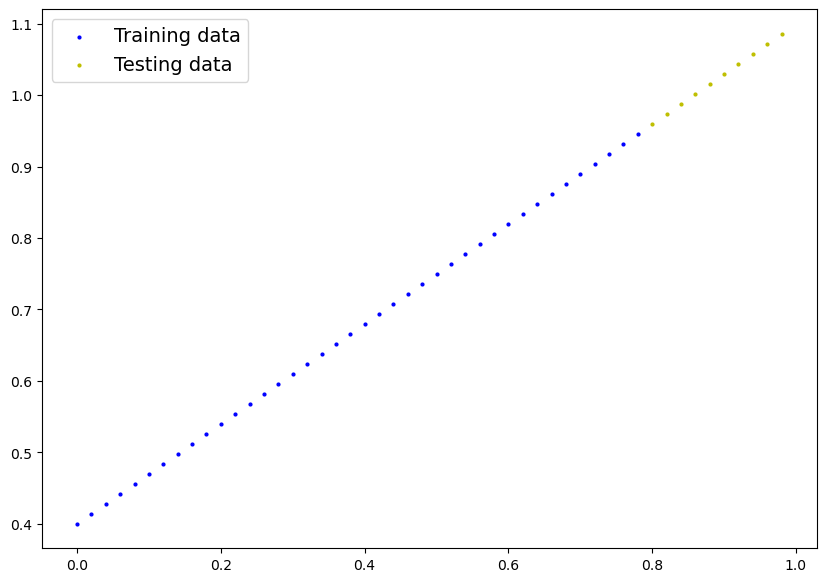

In [7]:
plot_predictions()

## 2) Build Model

In [8]:
from torch import nn
#linear regression model class 
class LinearRegressionModel(nn.Module): #<- almost everythig in pytorch inherites from nn.model
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                              requires_grad=True,
                                              dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                              dtype=torch.float))
        
        #forward method to define the computation in the model
        
    def forward(self,x:torch.Tensor) -> torch.Tensor:
        return self.weights*x + self.bias
        
        

#### Pytorch model building essentials

torch.nn -> contains all of the buildings for neural network

torch.nn.parameter > what parameters should our model try and learn 

torch.nn.Module -> the base class for all neural network models

torch.optim -> this where the optimizers in pytorch live , they will help wtih gradient descent


def forward() ->All nn.module subclassess require you to overwrite forward(). this method defines the computation in the model

#### checking the contents of our pytorch model

.parameters() 

.state_dict()


In [9]:
#create a random seed 
torch.manual_seed(42)

#create an object of the model (this is subclass of nn.module)
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

#### making prediction 

torch.inference_model()

In [11]:
x_test,y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.9600],
         [0.9740],
         [0.9880],
         [1.0020],
         [1.0160],
         [1.0300],
         [1.0440],
         [1.0580],
         [1.0720],
         [1.0860]]))

In [19]:
# https:/pytorch.org/docs/stable/generated/torch.inference_mode.html

In [12]:
with torch.inference_mode():
    y_preds = model_0(x_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

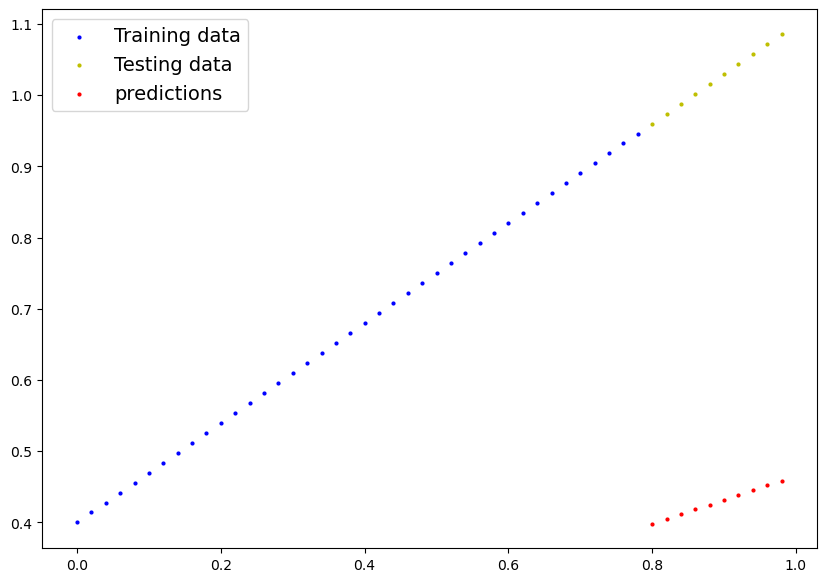

In [20]:
plot_predictions(predictions=y_preds)

## 3) Train Model

Things we need to train :- 
1) Loss functions :- Measure how wrong ur model predicts the ideal output , loss function is more minimum more better

https://pytorch.org/docs/stable/nn.html#loss-functions

2) Optimizer :- take into account the loss of a model and adjusts the models parameters to improved the loss function

https://pytorch.org/docs/stable/optim.html

Specifically for pytorch we need:-
1) A training loop

2) A testing loop

In [14]:
#Setup Loss Function
loss_fn = nn.L1Loss()

#Setup an optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),lr=0.01)


###### building a training loop (and testing loop) in python

A couple of things we need in a training loop:
    
1. Loop Through the data and do....
2. Forwrd pass(this involves data moving through our model's `Forward()`)
3. Calculate the loss(compare forward pass predictions to ground truth labesl)
4. Loss Backward - move backwards through the network to caluclate the gradients of each of the parametes of our model with respect to the loss
5. Optimizer step - use the optimizer to adjust our models's parameters to try and improve the loss (**gradient descent**)

In [35]:
torch.manual_seed(42)
#An epoch is one loop through the data....
epochs = 20  #hyperparameters beacuse we've set it

#Tracking different values 
train_loss_values = []
test_loss_values = []
epoch_count = []


### Training
for epoch in range(epochs):
    #set the model to training mode
    model_0.train() # train mode in PyTorch sets all parameters that requires gradients
    
    #1. Forward pass 
    y_pred = model_0(x_train)
    
    
    #2. Calculate the loss 
    loss = loss_fn(y_pred,y_train)
#     print(f"Loss each ecoch :- {loss}")
    
    #3. optimizer zero grad
    optimizer.zero_grad()
    
    #4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()
    
    #5 step the optimizer(perform gradient descent)
    optimizer.step() #to update the models parameters with respect to the gradients calculated by loss.backward()
    
    #-----------------------Testing-----------------------------------------------
    model_0.eval() #turns off gradient different settings in the model not needed for evaluation
    
    with torch.inference_mode(): #turns off gradient tracking and a couple more things behind 
    #with torch.no_grad(): #you may also see torch.no_grad() in older pytorch code 
      #2. Do the forward pass
        test_pred = model_0(x_test)
        
      #3. Calculate the loss 
        test_loss = loss_fn(test_pred,y_test)
        
    #pring out whats happenin 
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        print(f"Epoch: {epoch} | Mean Train Loss :{loss} | Mean Test loss : {test_loss}\n\n")

        #print out model state_dict()
        print(model_0.state_dict())

Epoch: 0 | Mean Train Loss :0.00849987007677555 | Mean Test loss : 0.0002990245702676475


OrderedDict([('weights', tensor([0.6941])), ('bias', tensor([0.4053]))])
Epoch: 10 | Mean Train Loss :0.00849987007677555 | Mean Test loss : 0.0002990245702676475


OrderedDict([('weights', tensor([0.6941])), ('bias', tensor([0.4053]))])


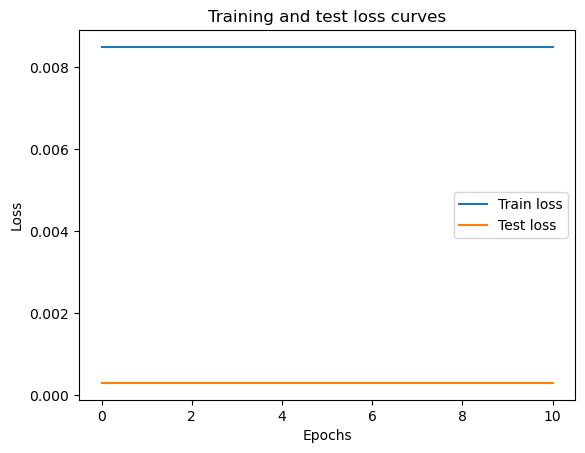

In [36]:


# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();


In [37]:
with torch.inference_mode():
    y_preds_new = model_0(x_test)

In [38]:
weight,bias

(0.7, 0.4)

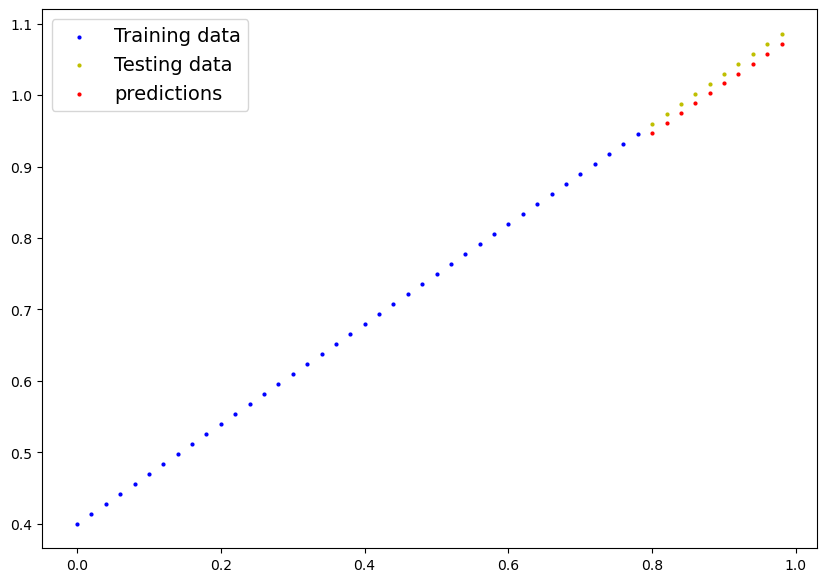

In [39]:
plot_predictions(predictions=y_preds_new)

 ## 4) Saving and loading a PyTorch model

torch.save  -> 	Saves a serialzed object to disk using Python's pickle utility. Models, tensors and various other Python objects like dictionaries can be saved using torch.save.
torch.load -> 	Uses pickle's unpickling features to deserialize and load pickled Python object files (like models, tensors or dictionaries) into memory. You can also set which device to load the object to (CPU, GPU etc).
torch.nn.Module.load_state_dict -> 	Loads a model's parameter dictionary (model.state_dict()) using a saved state_dict() object.


Saving a PyTorch model's state_dict()

The recommended way for saving and loading a model for inference (making predictions) is by saving and loading a model's state_dict().

Let's see how we can do that in a few steps:

   1) We'll create a directory for saving models to called models using Python's pathlib module.
   2) We'll create a file path to save the model to.
   3) We'll call torch.save(obj, f) where obj is the target model's state_dict() and f is the filename of where to save the model.


In [41]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models\01_pytorch_workflow_model_1.pth
